In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('pa2_train.csv')
df.columns = [str(i) for i in range(0,df.shape[1])]

df2 = pd.read_csv('pa2_valid.csv')
df.columns = [str(i) for i in range(0, df.shape[1])]

df['bias'] = 1.0;
df2['bias']  = 1.0;

In [176]:
df2.sample(5)

,5,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,...,0.0.47,0.0.48,0.0.49,0.0.50,0.0.51,0.0.52,0.0.53,0.0.54,0.0.55,bias
855,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
151,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1382,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
999,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
#Renaming samples 3 = 1 and 5=1 on trainining data

Y = df["0"]
Y =Y.apply(lambda x: 1 if x==3 else -1)

In [178]:
#Renaming samples 3 = 1 and 5= -1 on trainining data
val_y = df2["5"]
val_y = val_y.apply(lambda x: 1 if x==3 else -1)

In [179]:
#dropping y original value

train_df = df.drop(["0"], axis=1)
valid_df = df2.drop(["5"], axis=1)

In [180]:
train_df.shape
valid_df.shape

(1628, 785)

In [181]:
(n, features) = train_df.shape
(val_n, val_features) = valid_df.shape

In [182]:
W = np.array(np.zeros(features))
val_w = np.array(np.zeros(val_features))

In [183]:
c = 0
val_c =0
w_hat  = np.zeros(features)
val_w_hat = np.zeros(val_features)
y_hat = np.zeros(features)
val_y_hat = np.array(val_features)
s = 0
val_s = 0

In [184]:
iters = 15; _iter = 0;

In [185]:
Y.shape[0]

4887

In [186]:
training_accuracy = []
validation_accuracy = []

In [187]:
def predict_accuracy(x,y,w_hat):
    c=0
    for j in range (x.shape[0]):
        y_hat[j] = np.sign(np.dot(w_hat, x[j])) 
        if(y_hat[j] == 0):
            y_hat[j] = -1

        if(y_hat[j] != y[j]):
            c = c+1
    accuracy= (1-(c/x.shape[0]))*100
    return accuracy

In [188]:
while _iter < iters:
    error = 0
    for i in range(0, n):
        x = train_df.iloc[i]
        u = np.dot(x,W)
        yi = Y.iloc[i]
        
        if yi*u <= 0:
            if s+c >0:
                w_hat  = np.add(np.multiply(s,w_hat), np.multiply(c,W))/ np.add(s, c)
            s += c
            W= np.add(W,np.multiply(yi,x))
            c = 0
        else:
            c+=1
            error+=1
    training_accuracy.append(1-(c/x.shape[0]))
    #print(_iter, "Predition accuracy for training data is ", (1-(c/x.shape[0])))
    
    for i in range(0, val_n):
        val_x = valid_df.iloc[i]
        val_u = np.dot(val_x,val_w)
        val_yi = val_y.iloc[i]
        
        if val_yi*val_u <= 0:
            if val_s+val_c >0:
                val_w_hat  = np.add(np.multiply(val_s,val_w_hat), np.multiply(val_c,val_w))/ np.add(val_s, val_c)
            val_s += val_c
            val_w= np.add(val_w,np.multiply(val_yi,val_x))
            val_c = 0
        else:
            val_c+=1
    validation_accuracy.append(1-(val_c/val_x.shape[0]))
    
    _iter+=1
if c>0:
    w_hat  = np.add(np.multiply(s,w_hat), np.multiply(c,W))/ np.add(s, c)
if val_c>0:
    val_w_hat  = np.add(np.multiply(val_s,val_w_hat), np.multiply(val_c,val_w))/ np.add(val_s, val_c)

print("Training accuracy",training_accuracy)
print("validation accuracy",validation_accuracy)

Training accuracy [0.9821656050955414, 0.9668789808917198, 0.9668789808917198, 0.9859872611464968, 0.9859872611464968, 0.9847133757961783, 0.9859872611464968, 0.9821656050955414, 0.9847133757961783, 0.9859872611464968, 0.9821656050955414, 0.9859872611464968, 0.9859872611464968, 0.9859872611464968, 0.9859872611464968]
validation accuracy [0.9719745222929936, 0.9630573248407643, 0.9694267515923567, 0.9630573248407643, 0.975796178343949, 0.9579617834394905, 0.9528662420382166, 0.9694267515923567, 0.9528662420382166, 0.9528662420382166, 0.9528662420382166, 0.9528662420382166, 0.9528662420382166, 0.9528662420382166, 0.9426751592356688]


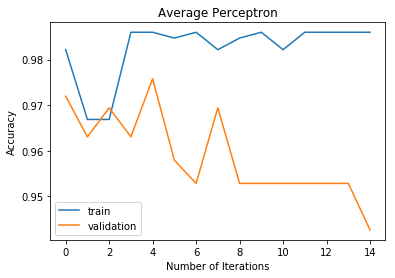

In [190]:
t, = plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], training_accuracy, label="train")
v, = plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], validation_accuracy, label="validation")
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Average Perceptron')
plt.legend(handles=[t,v], loc='best')